In [8]:
import pandas as pd
import glob

files = ["resale-1990-1999.csv",
         "resale-2000-Feb_2012.csv",
         "resale-Mar_2012-Dec_2014.csv",
         "resale-Jan_2015-Dec_2016.csv",
         "resale-Jan_2017_onwards.csv"]

dfs = []

for file in files:
    df1 = pd.read_csv(file,low_memory=False)
    # Ensure same column names: all column headers in lowercase and replace spaces with underscores
    df1.columns = [c.strip().lower().replace(" ", "_") for c in df1.columns]
    dfs.append(df1)

# Merge
df_all = pd.concat(dfs, ignore_index=True)

# Save
df_all.to_csv("hdb_resale.csv", index=False)

print("Columns after merge:", df_all.columns)
print("Combined shape:", df_all.shape)

Columns after merge: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')
Combined shape: (963149, 11)


In [9]:
# IMPORTS
import pandas as pd

# LOAD DATASET  
df = pd.read_csv("hdb_resale.csv",low_memory=False)
print("Columns:", list(df.columns))
df.head()

# convert to datetime for certain columns 
df['month'] = pd.to_datetime(df['month'],format='mixed')
                            

# Drop rows without critical data
df = df.dropna(subset=['resale_price','floor_area_sqm','town','month'])

# cast numeric and create year + price_psm
df['resale_price'] = pd.to_numeric(df['resale_price'], errors='coerce')
df['floor_area_sqm'] = pd.to_numeric(df['floor_area_sqm'], errors='coerce')
df = df.dropna(subset=['resale_price','floor_area_sqm'])
df = df[(df['resale_price']>1000) & (df['floor_area_sqm']>10)]

df['year'] = df['month'].dt.year
df['price_psm'] = df['resale_price'] / df['floor_area_sqm']

# save cleaned CSV
df.to_csv("hdb_resale_cleaned.csv", index=False)
print("Saved cleaned CSV:", "hdb_resale_cleaned.csv", "rows:", len(df))


Columns: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease']
Saved cleaned CSV: hdb_resale_cleaned.csv rows: 963149


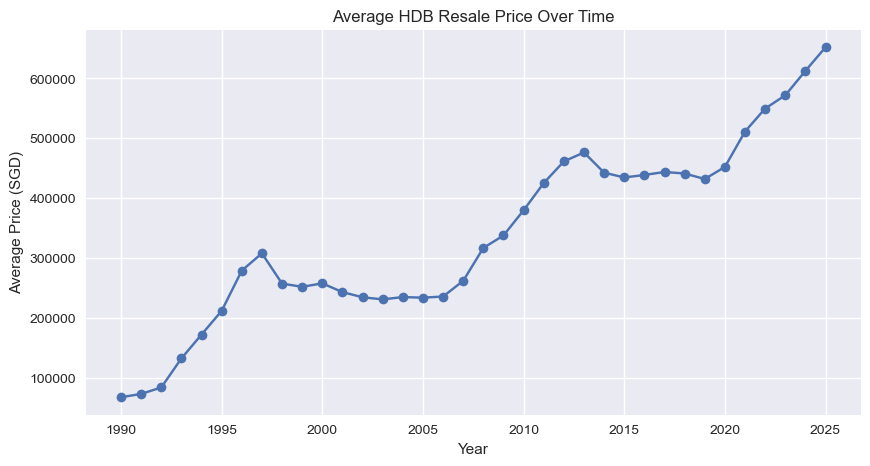

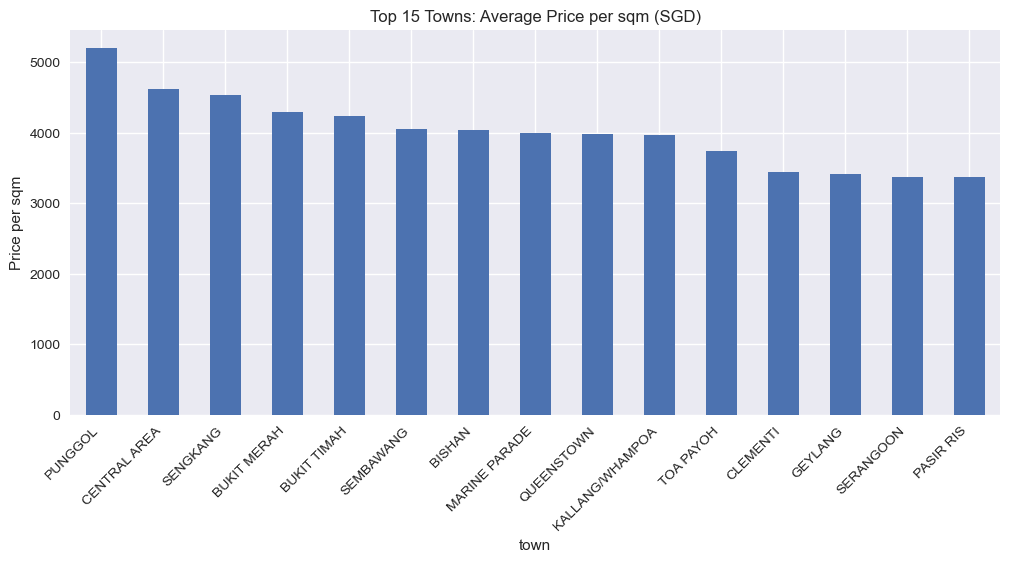

<Figure size 1200x600 with 0 Axes>

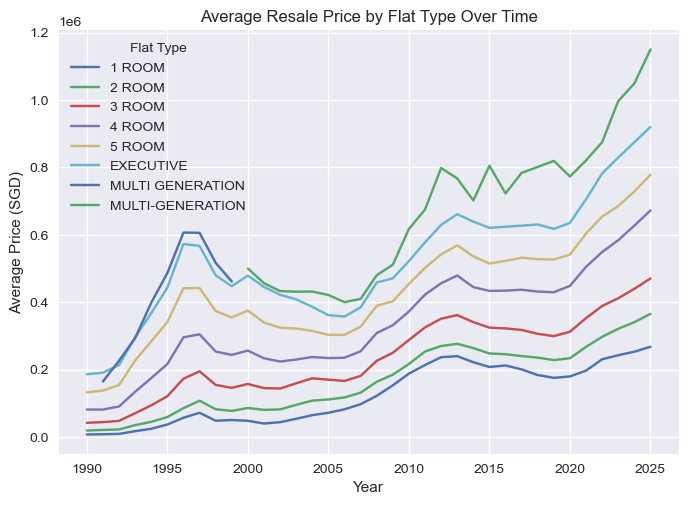

In [10]:
#imports 
import matplotlib.pyplot as plt
import os
plt.style.use("seaborn-v0_8")

# create folders for outputs
os.makedirs("visuals", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

# PLOT 1: Average price over time 
avg_price_by_year = df.groupby('year')['resale_price'].mean()
plt.figure(figsize=(10,5))
avg_price_by_year.plot(marker='o')
plt.title("Average HDB Resale Price Over Time")
plt.xlabel("Year"); plt.ylabel("Average Price (SGD)")
plt.grid(True)
plt.savefig("visuals/avg_price_by_year.png", bbox_inches='tight')
plt.show()

# PLOT 2: Top 15 towns by price per sqm 
avg_psm_town = df.groupby('town')['price_psm'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,5))
avg_psm_town.plot(kind='bar')
plt.title("Top 15 Towns: Average Price per sqm (SGD)")
plt.ylabel("Price per sqm")
plt.xticks(rotation=45, ha='right')
plt.savefig("visuals/psm_by_town.png", bbox_inches='tight')
plt.show()

# PLOT 3: Flat type trends over time
flat_trend = df.groupby(['year','flat_type'])['resale_price'].mean().unstack()
plt.figure(figsize=(12,6))
flat_trend.plot()
plt.title("Average Resale Price by Flat Type Over Time")
plt.xlabel("Year"); plt.ylabel("Average Price (SGD)")
plt.legend(title="Flat Type")
plt.savefig("visuals/flat_trend.png", bbox_inches='tight')
plt.show()


